In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as scicon

In [13]:
# solve r..
L = 5 # m
size = 20 + 1
center = size//2
radius = 6

E = np.zeros((size,size,size,1,3))
# B = np.array([[-1,0,-1]])
B = np.array([[0,0,0]])


r = np.empty((1,3)) # units: m
v = np.empty((1,3)) # units: m/s
qe = scicon.e
m = scicon.m_e
# qe = 1
# m = 1

N = np.zeros((size,size,size)) # units: 
for k in range(size):
    for j in range(size):
        for i in range(size):
            if (k-center)**2 + (j-center)**2 + (i-center)**2  == radius**2:
                N[k,j,i] += qe*L**-3


# construct initial positions r and initial velocity v
for k in range(size):
    for j in range(size):
        for i in range(size):
            if N[k,j,i] == qe*L**-3:
                r = np.append(r, [[k,j,i]], axis = 0) # r = np.append(r, [[1,2,3]], axis = 0)
                v = np.append(v, [[0,0,0]], axis = 0)
r = np.delete(r,0,0) # remove first element, which is empty
v = np.delete(v,0,0)
r *= (L/(size-1))


w=10
h=10
fig=plt.figure(figsize=(10, 10))
columns = 5
rows = int(ceil(size/columns))
for i in range(1, size):
    img = N[i-1,:,:]
#     ti = i*L*((size-1)**-1)
#     fig.add_subplot(rows, columns, i).title.set_text('z = %f m'%ti) # f for float. i for int
    fig.add_subplot(rows, columns, i).title.set_text('z = %i'%(i-1))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.imshow(img, cmap = 'rainbow')
fig.tight_layout()
plt.show()

In [17]:
def f1(T, t):
    dr_dt = T[1]
#     print(dr_dt)
    return dr_dt


def f2(T, t):
    r, v = T[0], T[1]
    dv_dt = []
    # implement boundary conditions
    for element in r:
        for index in range(len(element)):
            if 0 < element[index] < L:
                continue
            elif element[index] > L:
                element[index] = L - (element[index]%L)
            elif element[index] < 0:
                element[index] = element[index]%(-L)
                element[index] = abs(element[index])
    
    temp = 0
    q_test, q_source = qe, qe
    k = 1/(4*np.pi*scicon.epsilon_0)
    for index_t in range(len(r)):
        for index_s in range(len(r)):
            if index_t != index_s:
                test = r[index_t]
                source = r[index_s]
                d = test-source
                dmag = np.sqrt(d[0]**2 + d[1]**2 + d[2]**2)
                temp = temp + (q_source*(dmag**-3))*(d)
        temp = temp*(k*q_test/m)
        dv_dt.append(temp)
        temp = 0
    dv_dt = np.array(dv_dt)
    return dv_dt
                
            

def f(T, t):
    dr_dt = f1(T,t)
    dv_dt = f2(T,t)
    return np.array([dr_dt,dv_dt])


# h = 25e-12
h = 2e-3 #s
T = [r,v]
mult = 10
for t in np.arange(0,mult*h,h):
#     print(T[0])
    
    
    
    # calculate r from eq'n of motion
    k1 = h*f(T,t)
    k2 = h*f(T + 0.5*k1, t + 0.5*h)
    k3 = h*f(T + 0.5*k2, t + 0.5*h)
    k4 = h*f(T + k3, t + h)
    T += (k1 + 2*k2 + 2*k3 + k4)/6
#     print(T[0])
    
    # implement boundary conditions
    for element in T[0]:
        for index in range(len(element)):
            if element[index] > L:
                element[index] = L - (element[index]%L)
            elif element[index] < 0:
                element[index] = element[index]%(-L)
                element[index] = abs(element[index])
    
#     print(T[0])
    
    # update N mesh
    N = 0*N
    for index in range(len(T[0])):
        r0 = T[0][index]
#         print(r0*(size-1)/L)
#         k,j,i = int((r0[0]*(size-1)/L)//1), int((r0[1]*(size-1)/L)//1), int((r0[2]*(size-1)/L)//1)
        k,j,i = int(round(r0[0]*(size-1)/L)), int(round(r0[1]*(size-1)/L)), int(round(r0[2]*(size-1)/L))
#         print([k,j,i])
        N[k,j,i] += qe*L**-3
    
    print('pass complete') 
# print(T[0])

pass complete
pass complete
pass complete
pass complete
pass complete
pass complete
pass complete
pass complete
pass complete
pass complete


In [18]:
# https://stackoverflow.com/questions/46615554/how-to-display-multiple-images-in-one-figure-correctly
w=10
h=10
fig=plt.figure(figsize=(10, 10))
columns = 5
rows = int(ceil(size/columns))
for i in range(1, size):
    img = N[i-1,:,:]
#     ti = i*L*((size-1)**-1)
#     fig.add_subplot(rows, columns, i).title.set_text('z = %f m'%ti) # f for float. i for int
    fig.add_subplot(rows, columns, i).title.set_text('z = %i'%(i-1))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.imshow(img, cmap = 'rainbow')
fig.tight_layout()
plt.show()

[ 3.905605 10.       10.      ] [-7.82382554e+00  9.35522152e-17  7.53174614e-17]
[5.92513621 5.92513621 8.00172311] [-6.19190118 -6.19190118  0.10820324]
[ 5.92513621  5.92513621 11.99827689] [-6.19190118 -6.19190118 -0.10820324]
[5.92513621 8.00172311 5.92513621] [-6.19190118  0.10820324 -6.19190118]
[ 5.92513621  8.00172311 14.07486379] [-6.19190118  0.10820324  6.19190118]
[ 5.92513621 11.99827689  5.92513621] [-6.19190118 -0.10820324 -6.19190118]
[ 5.92513621 11.99827689 14.07486379] [-6.19190118 -0.10820324  6.19190118]
[ 5.92513621 14.07486379  8.00172311] [-6.19190118  6.19190118  0.10820324]
[ 5.92513621 14.07486379 11.99827689] [-6.19190118  6.19190118 -0.10820324]
[8.00172311 5.92513621 5.92513621] [ 0.10820324 -6.19190118 -6.19190118]
[ 8.00172311  5.92513621 14.07486379] [ 0.10820324 -6.19190118  6.19190118]
[ 8.00172311 14.07486379  5.92513621] [ 0.10820324  6.19190118 -6.19190118]
[ 8.00172311 14.07486379 14.07486379] [0.10820324 6.19190118 6.19190118]
[10.        3.9056

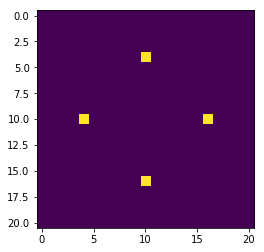

In [16]:
for index in range(len(T[0])):
    print(T[0][index]*(size-1)/L,T[1][index])

print(qe/m)
# print(-99%-100)
# print(T[0][10]*(size-1)/L,T[1][10]*(size-1)/L)
print(T[0][0])
plt.imshow(N[10,:,:])
# print(qe, 1/(4*np.pi*scicon.epsilon_0), qe/m, (qe**2)/(4*m*np.pi*scicon.epsilon_0))